In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
import pandas as pd

df = pd.read_csv('calories.csv')
print(df)

      Unnamed: 0   kg  calories
0              0  162    293.22
1              1   66    120.12
2              2  161    293.02
3              3  108    198.72
4              4  107    194.74
...          ...  ...       ...
9995        9995  145    266.80
9996        9996  152    266.00
9997        9997   95    172.90
9998        9998  125    218.75
9999        9999   74    136.16

[10000 rows x 3 columns]


In [4]:
model = LinearRegression()

In [5]:
dati_esercizio = pd.DataFrame({
    'Peso_kg': df['kg'],
    'Calorie_Bruciate': df['calories']
})
print("Prime 5 righe del nostro DataFrame di esempio:")
print(dati_esercizio.head())
print("\nStatistiche descrittive del DataFrame:")
print(dati_esercizio.describe())

Prime 5 righe del nostro DataFrame di esempio:
   Peso_kg  Calorie_Bruciate
0      162            293.22
1       66            120.12
2      161            293.02
3      108            198.72
4      107            194.74

Statistiche descrittive del DataFrame:
            Peso_kg  Calorie_Bruciate
count  10000.000000      10000.000000
mean     109.411000        197.053247
std       34.946348         63.097848
min       50.000000         87.500000
25%       79.000000        141.600000
50%      110.000000        197.580000
75%      140.000000        250.627500
max      170.000000        314.500000


In [11]:
X = dati_esercizio[['Peso_kg']]
y = dati_esercizio['Calorie_Bruciate'] 
# 80% per addestrare, 20% per testare.
X_addestramento, X_test, y_addestramento, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nDimensione del set di addestramento (X_addestramento): {X_addestramento.shape}")
print(f"Dimensione del set di test (X_test): {X_test.shape}")
print("\nModello di Regressione Lineare addestrato con successo!")



Dimensione del set di addestramento (X_addestramento): (80, 1)
Dimensione del set di test (X_test): (20, 1)

Modello di Regressione Lineare addestrato con successo!


In [14]:
modello_regressione = LinearRegression()
modello_regressione.fit(X_addestramento, y_addestramento)
print("\nModello di Regressione Lineare addestrato con successo!")

print(f"Coefficiente (pendenza della retta, m): {modello_regressione.coef_[0]:.2f}")
print(f"Intercetta (punto in cui la retta incrocia l'asse y, q): {modello_regressione.intercept_:.2f}")



Modello di Regressione Lineare addestrato con successo!
Coefficiente (pendenza della retta, m): 4.95
Intercetta (punto in cui la retta incrocia l'asse y, q): 200.59


In [16]:
previsioni_calorie = modello_regressione.predict(X_test)

print(f"\nPrevisioni del modello per le prime 5 istanze nel set di test:")
for i in range(5):
    print(f"  Peso: {X_test.iloc[i]['Peso_kg']} kg -> Previsto: {previsioni_calorie[i]:.2f} calorie | Reale: {y_test.iloc[i]:.2f} calorie")



Previsioni del modello per le prime 5 istanze nel set di test:
  Peso: 89 kg -> Previsto: 641.48 calorie | Reale: 585.15 calorie
  Peso: 96 kg -> Previsto: 676.15 calorie | Reale: 725.74 calorie
  Peso: 67 kg -> Previsto: 532.49 calorie | Reale: 633.25 calorie
  Peso: 74 kg -> Previsto: 567.17 calorie | Reale: 557.21 calorie
  Peso: 53 kg -> Previsto: 463.14 calorie | Reale: 501.20 calorie


In [17]:
mse = mean_squared_error(y_test, previsioni_calorie)
r2 = r2_score(y_test, previsioni_calorie)

print(f"\nErrore Quadratico Medio (MSE): {mse:.2f}")
print(f"Coefficiente di Determinazione (R-quadrato): {r2:.2f}")


Errore Quadratico Medio (MSE): 3031.50
Coefficiente di Determinazione (R-quadrato): 0.55


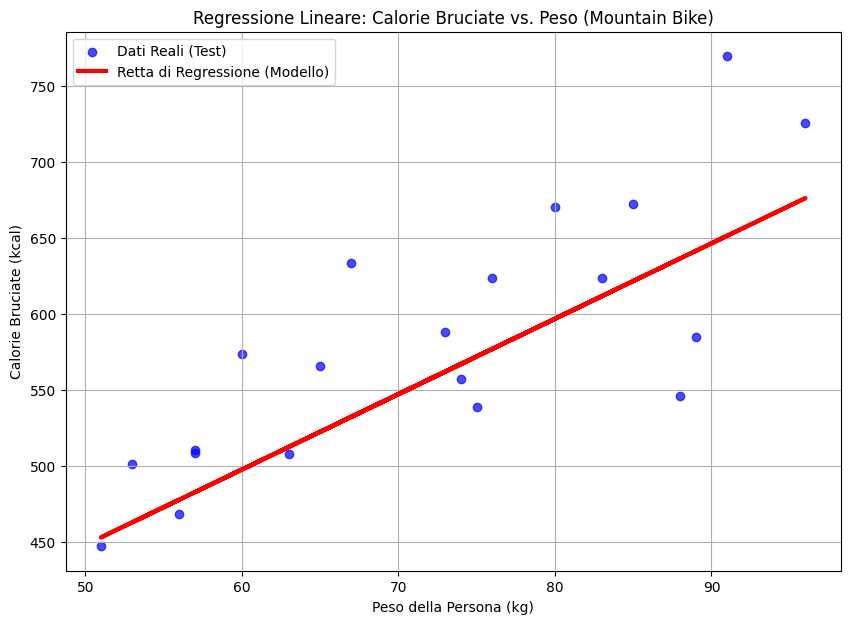

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_test, color='blue', label='Dati Reali (Test)', alpha=0.7)
plt.plot(X_test, previsioni_calorie, color='red', linewidth=3, label='Retta di Regressione (Modello)')

plt.title('Regressione Lineare: Calorie Bruciate vs. Peso (Mountain Bike)')
plt.xlabel('Peso della Persona (kg)')
plt.ylabel('Calorie Bruciate (kcal)')
plt.legend() 
plt.grid(True) 
plt.show()

In [19]:
nuovo_peso = np.array([[75]]) 
calorie_previste_nuovo = modello_regressione.predict(nuovo_peso)
print(f"\nPer una persona di {nuovo_peso[0][0]} kg, il modello prevede circa {calorie_previste_nuovo[0]:.2f} calorie bruciate.")


Per una persona di 75 kg, il modello prevede circa 572.12 calorie bruciate.


C:\Users\Roman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
